<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/Friendship_goals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
! unzip '/content/drive/My Drive/HackerEarth_deep_learning/Age_group.zip' -d '/content/drive/My Drive/HackerEarth'

Archive:  /content/drive/My Drive/HackerEarth_deep_learning/Age_group.zip
   creating: /content/drive/My Drive/HackerEarth/Dataset/
 extracting: /content/drive/My Drive/HackerEarth/Dataset/Test Data.zip  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Sample Submission.csv  
 extracting: /content/drive/My Drive/HackerEarth/Dataset/Sample Data.zip  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test.csv  


# Problem Statement

To celebrate this precious relationship of friendship on the upcoming International Friendship Day, we bring a deep learning challenge to you: #FriendshipGoals. The Anthropology department of an Ivy League school is planning to study the impact of friendship at different life stages. You have been hired as a deep learning specialist to assist their team in this project.

Your task is to build a deep learning model that analyzes an image of a gathering among friends, detects the age group of the gathering, and classifies them into groups of toddlers, teenagers, or adults.

## Data

*Data files*

*File name	Description*

* Test.zip	Contains image files to be classified
* Sample.zip	Contains sample image files belonging to each category
* Test.csv	Predictions file containing indices of test data and a blank target column
* sample_submission.csv	Submission format that must be followed for uploading predictions


*Data description*

* Filename : 	File name of test data image
* Category	: Target column ['Toddler'/'Teenagers'/'Adults']

In [3]:
! unzip '/content/drive/My Drive/HackerEarth/Dataset/Sample Data.zip' -d '/content/drive/My Drive/HackerEarth/Dataset/Train'

Archive:  /content/drive/My Drive/HackerEarth/Dataset/Sample Data.zip
   creating: /content/drive/My Drive/HackerEarth/Dataset/Train/Sample Data/
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Train/Sample Data/Sample_Toddlers.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Train/Sample Data/Sample_Adults.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Train/Sample Data/Sample_Teenagers.jpg  


In [4]:
!unzip '/content/drive/My Drive/HackerEarth/Dataset/Test Data.zip' -d '/content/drive/My Drive/HackerEarth/Dataset/Test'

Archive:  /content/drive/My Drive/HackerEarth/Dataset/Test Data.zip
   creating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1038.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1248.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1077.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1279.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img3606.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img3669.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1382.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img5182.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1071.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1186.jpg  

In [207]:
import pandas as pd
import numpy as np
test = pd.read_csv('/content/drive/My Drive/HackerEarth/Dataset/Test.csv')
test.head()

Filename
0  Img1137.jpg
1  Img3633.jpg
2  Img1474.jpg
3  Img3459.jpg
4  Img5578.jpg

In [208]:
test.shape

(314, 1)

In [8]:
! unzip '/content/drive/My Drive/HackerEarth/Dataset/Train Images.zip' -d '/content/drive/My Drive/HackerEarth/'

Archive:  /content/drive/My Drive/HackerEarth/Dataset/Train Images.zip
   creating: /content/drive/My Drive/HackerEarth/Train Images/adults/
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults0.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults1.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults10.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults11.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults12.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults13.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults14.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults15.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults16.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Train Images/adults/adults17.jpg  
  inflating: /content

In [9]:
! unzip '/content/drive/My Drive/HackerEarth/Dataset/Valid Images.zip' -d '/content/drive/My Drive/HackerEarth/'

Archive:  /content/drive/My Drive/HackerEarth/Dataset/Valid Images.zip
   creating: /content/drive/My Drive/HackerEarth/Valid Images/adults/
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults0.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults1.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults10.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults11.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults12.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults13.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults14.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults15.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults16.jpg  
  inflating: /content/drive/My Drive/HackerEarth/Valid Images/adults/adults17.jpg  
  inflating: /content

In [6]:
path = '/content/drive/My Drive/HackerEarth'

In [127]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [157]:
data = ImageDataBunch.from_folder(path,train='Train Images',valid='Valid Images',ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)

In [158]:
data.classes

['Adults', 'Teenagers', 'Toddler']

In [159]:
data.c

3

In [160]:
data

ImageDataBunch;

Train: LabelList (454 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Adults,Adults,Adults,Adults,Adults
Path: /content/drive/My Drive/HackerEarth;

Valid: LabelList (145 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Toddler,Toddler,Toddler,Toddler,Toddler
Path: /content/drive/My Drive/HackerEarth;

Test: None

In [161]:
data.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f60333ecb70>, device=device(type='cuda', index=0), tfms=[functools.partial(<function _normalize_batch at 0x7f60800b28c8>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f6088577840>)

In [162]:
data.valid_ds

LabelList (145 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Toddler,Toddler,Toddler,Toddler,Toddler
Path: /content/drive/My Drive/HackerEarth

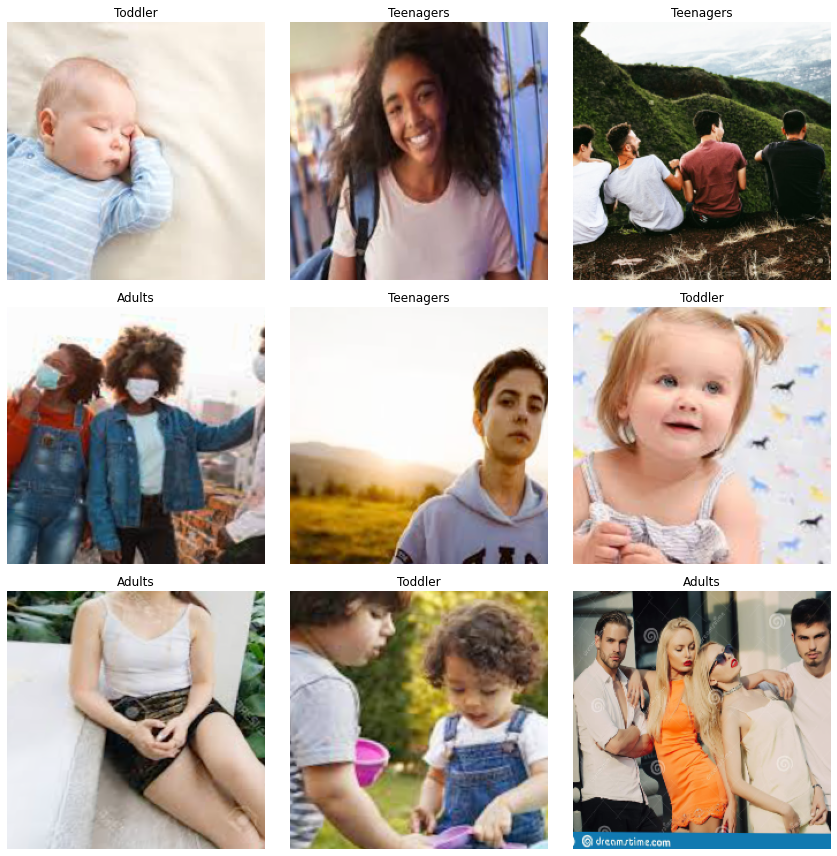

In [163]:
data.show_batch(rows=3,figszie=(12,12))

In [164]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [165]:
learn.fit(5)

In [166]:
DatasetType.Valid

<DatasetType.Valid: 2>

## Validation Accuracy

In [167]:
preds,y = learn.get_preds(ds_type=DatasetType.Valid)



In [168]:
accuracy(preds,y)

tensor(0.9586)

In [170]:
learn.fit_one_cycle(5)

In [171]:
learn.fit_one_cycle(15)

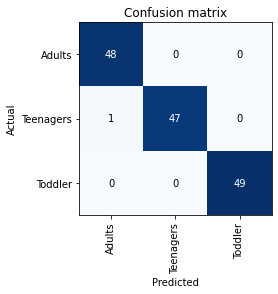

In [172]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

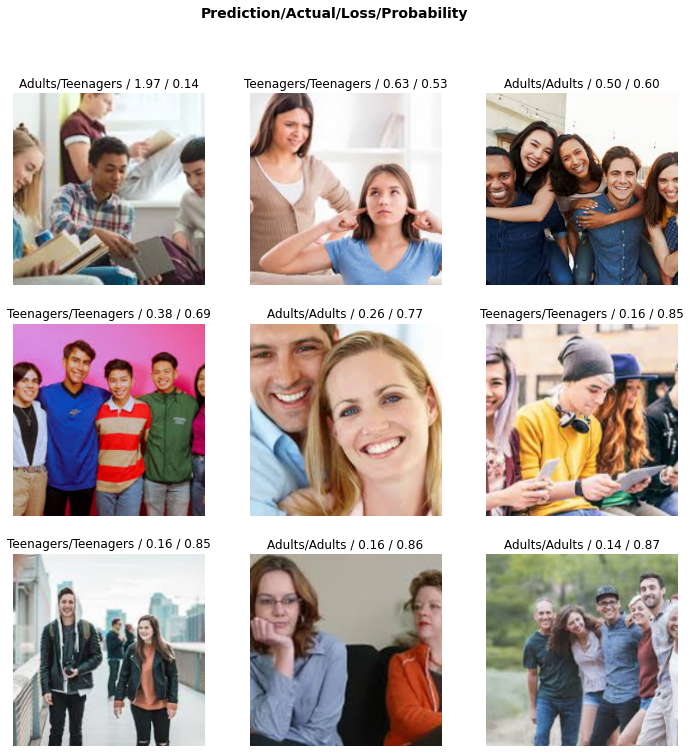

In [173]:
interp.plot_top_losses(9)

In [174]:
learn.save('save1')

In [175]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


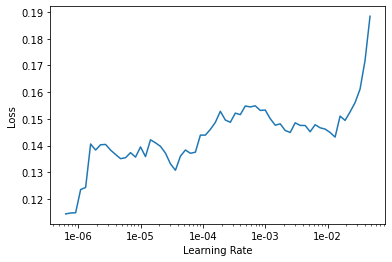

In [176]:
learn.recorder.plot()

In [177]:
learn.fit_one_cycle(10,1e-6)

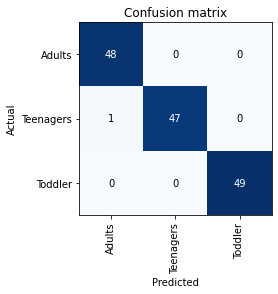

In [178]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

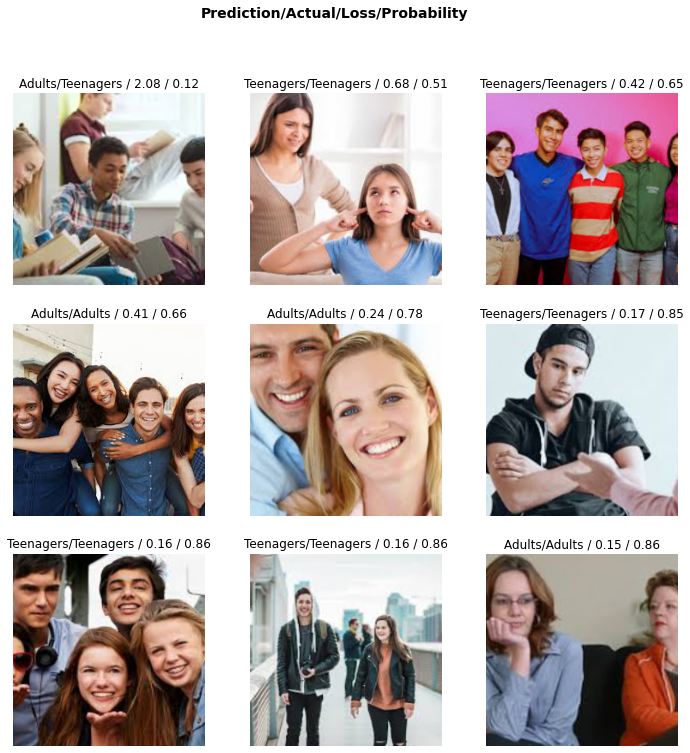

In [179]:
interp.plot_top_losses(9)

In [186]:
learn.unfreeze()
learn.fit_one_cycle(25,1e-6)

In [187]:
preds,y = learn.get_preds(ds_type=DatasetType.Valid)
accuracy(preds,y)

tensor(0.9931)

In [188]:
learn.save('save2')

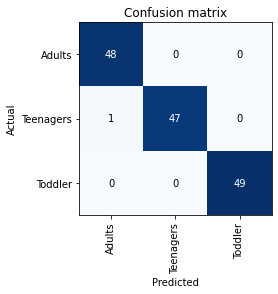

In [189]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

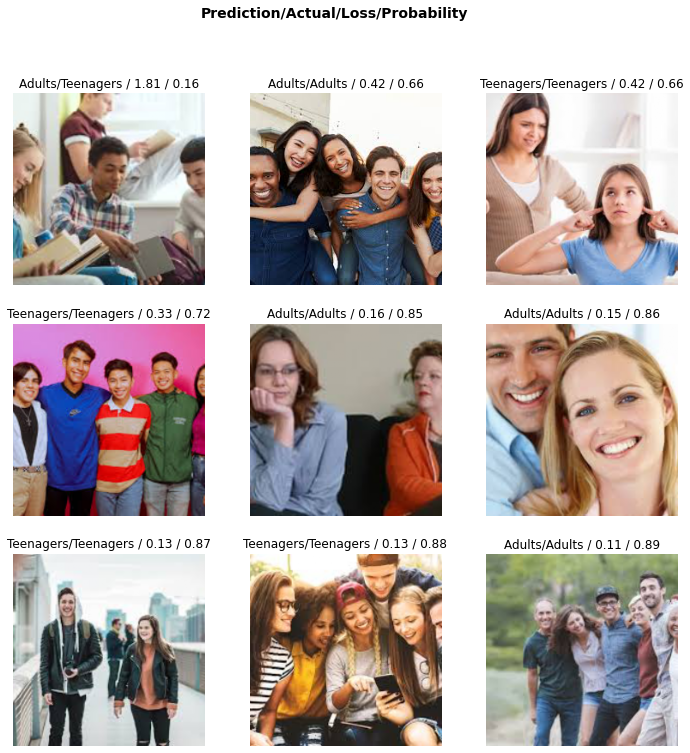

In [185]:
interp.plot_top_losses(9)

In [50]:
sub = pd.read_csv('/content/drive/My Drive/HackerEarth/Dataset/Sample Submission.csv')
sub.head()

Filename   Category
0  Img1137.jpg  Teenagers
1  Img3633.jpg    Toddler
2  Img1474.jpg     Adults
3  Img3459.jpg  Teenagers
4  Img5578.jpg    Toddler

# Visualize Submission Images

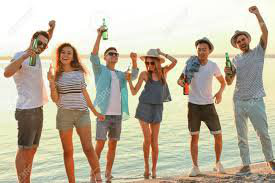

In [190]:
import PIL
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1474.jpg')

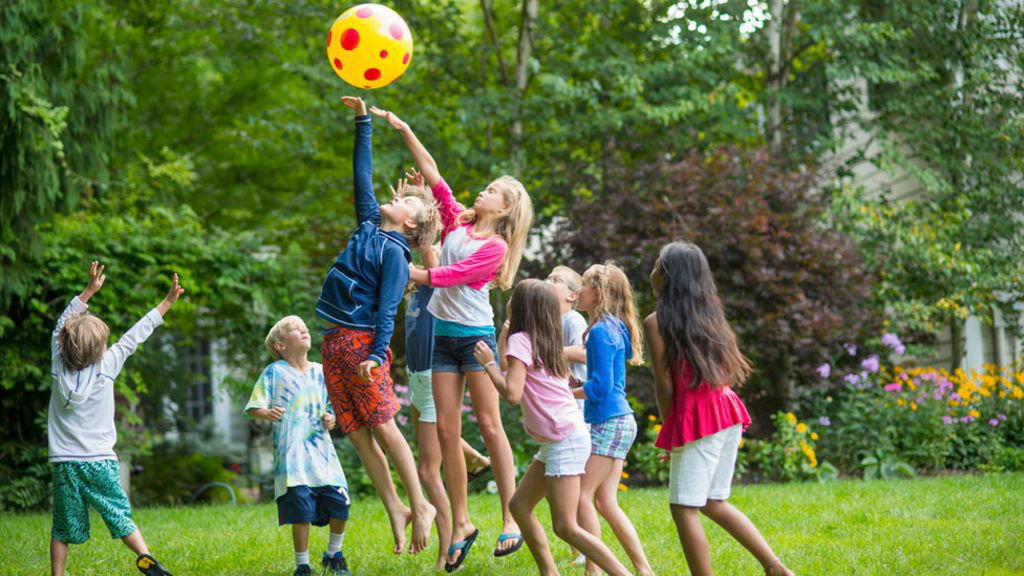

In [191]:
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img5578.jpg')

In [ ]:
Img1137.jpg

# Add Test Folder

In [192]:
test_data = ImageList.from_df(test, '/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data')
data.add_test(test_data)

In [194]:
learn.load('save2')

Learner(data=ImageDataBunch;

Train: LabelList (454 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Adults,Adults,Adults,Adults,Adults
Path: /content/drive/My Drive/HackerEarth;

Valid: LabelList (145 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Toddler,Toddler,Toddler,Toddler,Toddler
Path: /content/drive/My Drive/HackerEarth;

Test: LabelList (314 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/HackerEarth, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, 

In [195]:
test_predictions = []
for test_image in test_data:
    test_predictions.append(data.classes[learn.predict(test_image)[1]])

In [196]:
test

Filename   Category
0    Img1137.jpg     Adults
1    Img3633.jpg     Adults
2    Img1474.jpg     Adults
3    Img3459.jpg     Adults
4    Img5578.jpg  Teenagers
..           ...        ...
309  Img2040.jpg  Teenagers
310  Img1951.jpg  Teenagers
311  Img5148.jpg  Teenagers
312  Img3968.jpg  Teenagers
313  Img6290.jpg    Toddler

[314 rows x 2 columns]

In [197]:
test['Category'] = test_predictions

In [198]:
test

Filename   Category
0    Img1137.jpg     Adults
1    Img3633.jpg     Adults
2    Img1474.jpg     Adults
3    Img3459.jpg     Adults
4    Img5578.jpg  Teenagers
..           ...        ...
309  Img2040.jpg  Teenagers
310  Img1951.jpg  Teenagers
311  Img5148.jpg  Teenagers
312  Img3968.jpg  Teenagers
313  Img6290.jpg    Toddler

[314 rows x 2 columns]

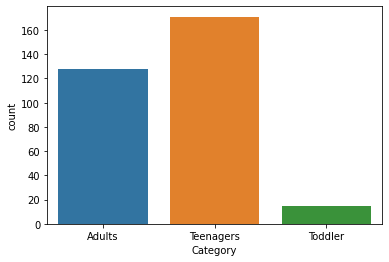

In [199]:
sns.countplot(test['Category'])

In [200]:
test[test['Category']=='Toddler'].head()

Filename Category
7    Img6559.jpg  Toddler
31   Img5656.jpg  Toddler
55   Img2369.jpg  Toddler
123  Img5705.jpg  Toddler
139  Img6153.jpg  Toddler

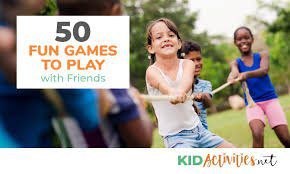

In [64]:
import PIL
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img5656.jpg')

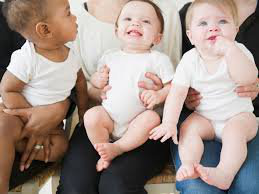

In [202]:
import PIL
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img6559.jpg')

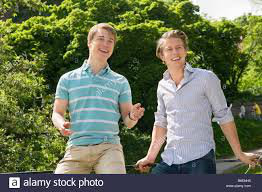

In [56]:
import PIL
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1137.jpg')

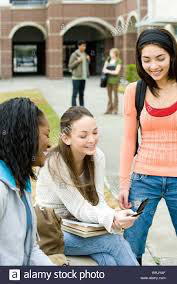

In [100]:
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img3633.jpg')

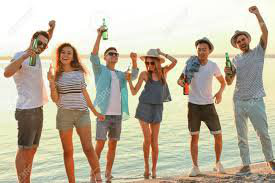

In [203]:
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img1474.jpg')

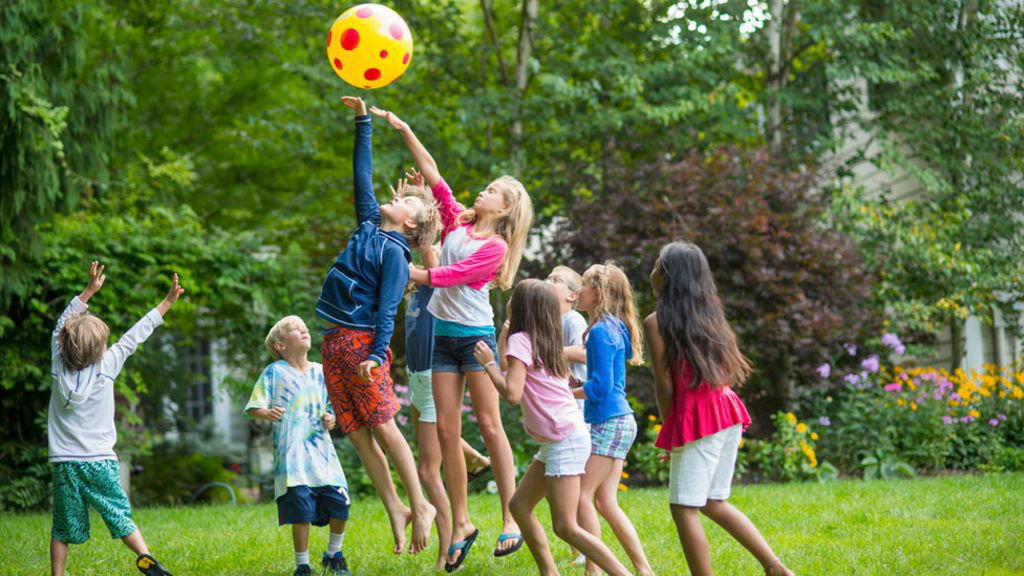

In [65]:
PIL.Image.open('/content/drive/My Drive/HackerEarth/Dataset/Test/Test Data/Img5578.jpg')

# Visualize Predictions made by the resnet34 Model

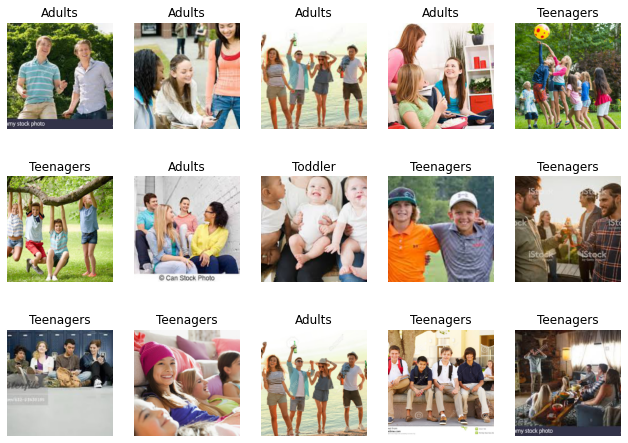

In [204]:
_,axs = plt.subplots(3,5,figsize=(11,8))
for i,ax in enumerate(axs.flatten()): 
  img = data.test_ds[i][0]
  img.show(ax=ax,y=learn.predict(img)[0])

In [205]:
test.to_csv('Sub2.csv',index=False)

In [206]:
test.shape

(314, 2)